# Python para Engenharia - Março/2024
Andre Nepomuceno - UFF

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.optimize import curve_fit
from scipy.integrate import quad, solve_ivp
%matplotlib inline

**1. Listas**

In [7]:
q1 = [1,2,3.5,8]
q1

[1, 2, 3.5, 8]

In [8]:
q2 = q1.copy()
q2

[1, 2, 3.5, 8]

In [9]:
q2[1] = 9.8
q2

[1, 9.8, 3.5, 8]

In [10]:
q1

[1, 2, 3.5, 8]

In [11]:
q2

[1, 9.8, 3.5, 8]

In [13]:
q2.append('y')
q2

[1, 9.8, 3.5, 8, 'y', 'y']

In [14]:
import math
L = []
for i in range(10):
    x = math.sqrt(i)
    L.append(x)    

In [15]:
L

[0.0,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 2.23606797749979,
 2.449489742783178,
 2.6457513110645907,
 2.8284271247461903,
 3.0]

**2. Numpy**

In [21]:
np.arange(10,1,-0.5)

array([10. ,  9.5,  9. ,  8.5,  8. ,  7.5,  7. ,  6.5,  6. ,  5.5,  5. ,
        4.5,  4. ,  3.5,  3. ,  2.5,  2. ,  1.5])

In [23]:
a = np.array([ [1,0,1], [1,2,2] ])
a

array([[1, 0, 1],
       [1, 2, 2]])

In [24]:
a.shape

(2, 3)

In [25]:
a.ndim

2

In [27]:
a.size

6

In [29]:
a.nbytes

48

In [38]:
 a = np.array([1.3,2.5,10.1])
 b = np.array([9.3,0.2,0.4])

In [39]:
a + b

array([10.6,  2.7, 10.5])

In [32]:
a/b

array([ 0.13978495, 12.5       ,  8.41666667])

In [34]:
a**2 + b**3

array([806.047,   6.258, 103.738])

In [40]:
a = 2*np.linspace(1,6,6)
a

array([ 2.,  4.,  6.,  8., 10., 12.])

In [41]:
t = a > 6
t

array([False, False, False,  True,  True,  True])

In [42]:
a [ a >6 ] 

array([ 8., 10., 12.])

In [43]:
a = np.array([ [1,3], [2,4] ])
b = np.array([ [4,-2],[-3,1] ])
c = np.array([ [1,2], [2,1] ])

In [44]:
r = np.dot(a,b) + 2*c
r

array([[-3,  5],
       [ 0,  2]])

12.566370614359172

In [51]:
 M = np.random.random((3,4))
 M

array([[0.76111238, 0.93533362, 0.88534862, 0.94398738],
       [0.60575182, 0.27383114, 0.98379645, 0.73536624],
       [0.16178008, 0.83168916, 0.18215692, 0.80072202]])

In [52]:
M.sum()

8.100875830217372

In [53]:
M.sum(axis=0)

array([1.52864428, 2.04085392, 2.05130199, 2.48007564])

In [54]:
M.sum(axis=1)

array([3.525782  , 2.59874565, 1.97634818])

In [57]:
M.argmax(axis=0)

array([0, 0, 1, 0])

In [58]:
a = np.linspace(1,6,6)
a

array([1., 2., 3., 4., 5., 6.])

In [72]:
a[:-1:2]

array([1., 3., 5.])

Lendo arquivo de dados

In [8]:
t, y = np.loadtxt('dados_bola_caindo.dat',usecols=(0,1),unpack=True)

In [11]:
data[:10]

array([[0.        , 2.        ],
       [0.01      , 1.99946046],
       [0.02      , 1.99793999],
       [0.03      , 1.99543883],
       [0.04      , 1.99195732],
       [0.05      , 1.98749596],
       [0.06      , 1.98205539],
       [0.07      , 1.9756364 ],
       [0.08      , 1.9682399 ],
       [0.09      , 1.95986697]])

In [13]:
data[:,1]

array([2.        , 1.99946046, 1.99793999, 1.99543883, 1.99195732,
       1.98749596, 1.98205539, 1.9756364 , 1.9682399 , 1.95986697,
       1.95051879, 1.94019673, 1.92890225, 1.91663698, 1.90340268,
       1.88920123, 1.87403466, 1.85790513, 1.84081493, 1.82276649,
       1.80376235, 1.78380521, 1.76289786, 1.74104324, 1.7182444 ,
       1.69450453, 1.66982692, 1.64421499, 1.61767226, 1.5902024 ,
       1.56180916, 1.5324964 , 1.50226811, 1.47112838, 1.43908139,
       1.40613145, 1.37228293, 1.33754033, 1.30190824, 1.26539133,
       1.22799438, 1.18972224, 1.15057986, 1.11057226, 1.06970457,
       1.02798195, 0.98540969, 0.94199311, 0.89773763, 0.85264872,
       0.80673194, 0.75999289, 0.71243725, 0.66407074, 0.61489915,
       0.56492833, 0.51416417, 0.4626126 , 0.41027962, 0.35717126,
       0.3032936 , 0.24865275, 0.19325486, 0.13710612, 0.08021275,
       0.022581  ])

Autovalores e Autovetores

In [14]:
A = np.array([[0,0.5], [-1,2]])
print(A,'\n')

[[ 0.   0.5]
 [-1.   2. ]] 



In [18]:
np.trace(A)

2.0

In [20]:
Ainv = np.linalg.inv(A)

In [22]:
np.dot(A,Ainv)

array([[1., 0.],
       [0., 1.]])

In [23]:
np.transpose(A)

array([[ 0. , -1. ],
       [ 0.5,  2. ]])

In [24]:
#Autovalores e Autovetores
vals, vecs = np.linalg.eig(A)
print(vals)

[0.29289322 1.70710678]


In [25]:
vecs

array([[-0.86285621, -0.28108464],
       [-0.50544947, -0.95968298]])

In [26]:
x1 = vecs[:,0]
x1

array([-0.86285621, -0.50544947])

**Exemplo 2: Modos de vibração** \
\begin{gather}
 \begin{pmatrix} 10 & -5 \\ -5 & 10
 \end{pmatrix}
  \begin{pmatrix} X_1 \\ X_2
 \end{pmatrix}
 =
 \omega^2
\begin{pmatrix} X_1 \\ X_2
 \end{pmatrix}
\end{gather} 

In [27]:
A = np.array([ [10,-5],[-5,10]])
A

array([[10, -5],
       [-5, 10]])

In [28]:
omega2, X = np.linalg.eig(A)
omega2

array([15.,  5.])

In [29]:
X

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

**Exemplo 3: Circuito** \
Vamos escrever o sistema na forma matricial (RI = V)
\begin{gather}
\begin{pmatrix}
50 & 0 & -30\\
0 & 40 & -20 \\
-30 & -20 & 100
\end{pmatrix}
\begin{pmatrix}
I_1 \\
I_2 \\
I_3
\end{pmatrix}
= 
\begin{pmatrix}
80\\
80\\
0
\end{pmatrix}
\end{gather}

In [9]:
R = np.array([[50, 0, -30], [0, 40, -20], [-30, -20, 100]])
V = np.array([80,80,0])   

In [10]:
I1, I2, I3 = np.linalg.solve(R,V)

In [11]:
print('I1 = {:.2f} A'.format(I1))
print('I2 = {:.2f} A'.format(I2))
print('I3 = {:.2f} A'.format(I3))

I1 = 2.33 A
I2 = 2.61 A
I3 = 1.22 A


**3. Matplotlib**

3.1 - Gráfico Simples

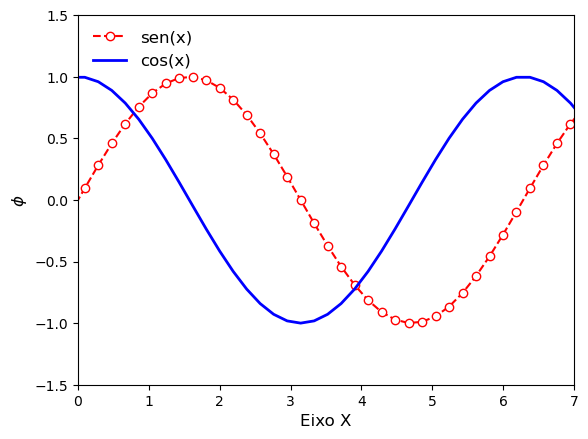

In [47]:
x = np.linspace(-3*np.pi,3*np.pi,100)
y = np.sin(x)
z = np.cos(x)
#plt.plot(x,y,label='sen(x)')
#plt.plot(x,z,label='cos(x)')
#plt.legend(loc=2,frameon=False)
#plt.xlabel('X',fontsize=14)
#plt.ylabel('Y',fontsize=14)
#plt.xlim(-7.5,7.5)
#plt.ylim(-1.5,1.5)
#plt.plot(x,z)
#plt.legend(loc=2,frameon=False)
plt.xlim(0,7)
plt.ylim(-1.5,1.5)
plt.xlabel('Eixo X',fontsize=12)
plt.ylabel(r'$\phi$',fontsize=12)
#plt.legend(loc=2)
plt.plot(x,y,'r--',marker='o',mec='r',mfc='w',markersize=6,label='sen(x)')
plt.plot(x,z,c='b',lw=2,label='cos(x)')
plt.legend(loc=2,fontsize=12,frameon=False)
#plt.savefig('meu_grafico.pdf')
#ax = plt.gca()
#ax.tick_params(labelsize=15)

3.2 - Gráfico de Barras

Text(0, 0.5, 'Consumo em milhares de sacas')

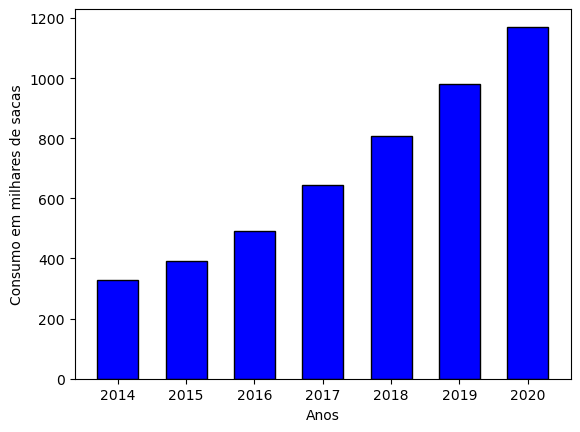

In [54]:
anos = np.arange(2014,2021)
consumo = np.array([327,392,490,643,806,981,1171])
#plt.bar(anos,consumo)
plt.bar(anos, consumo, width=0.6,color='b',edgecolor='k')
plt.xlabel('Anos')
plt.ylabel('Consumo em milhares de sacas')

3.3 - Barra de Erros

<ErrorbarContainer object of 3 artists>

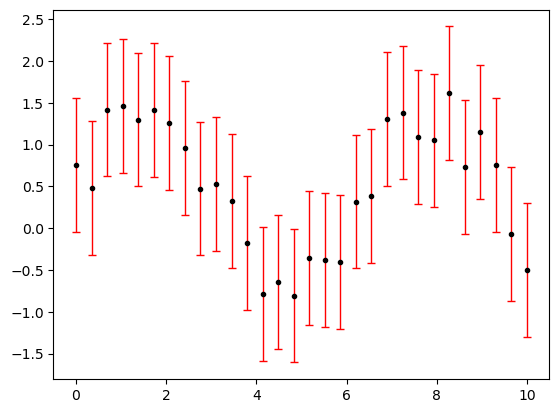

In [59]:
x = np.linspace(0,10,30)
dy = 0.8 
y = np.sin(x) + dy*np.random.random(30)
#plt.errorbar(x,y,yerr=dy,fmt='ko')
plt.errorbar(x,y,yerr=dy,ecolor='r',elinewidth=1,capsize=3,fmt='k.')

3.4 - Histograma

done


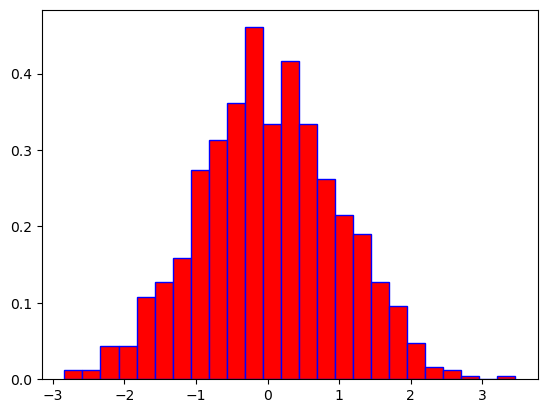

In [63]:
data = np.random.randn(1000) 
#plt.hist(data,bins=25)
plt.hist(data,bins=25,color='r',edgecolor='b',density=True)
print('done')

3.5 - Scatter Plots

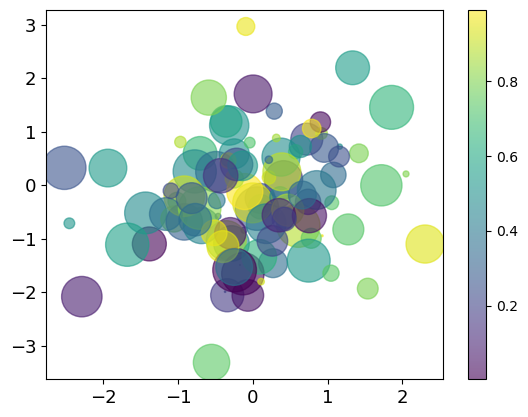

In [2]:
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000*np.random.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.6)
plt.colorbar()
plt.tick_params(labelsize=13)

3.6 - Gráficos com doix Eixos

In [30]:
tempo = np.arange(2000,2010)
margarina = np.array([8.2,7,6.5,5.3,5.2,4,4.6,4.5,4.2,3.7])
divorcios = np.array([5.,4.7,4.6,4.4,4.3,4.1,4.2,4.2,4.2,4.1])
tempo.size == divorcios.size

True

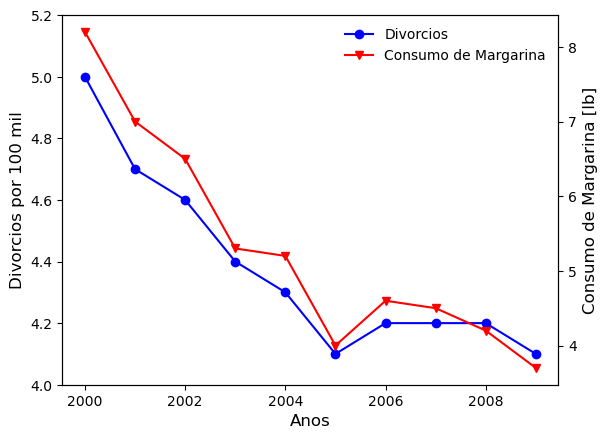

In [33]:
line1 = plt.plot(tempo,divorcios,'b-o')
plt.ylim(4,5.2)
plt.ylabel('Divorcios por 100 mil',fontsize=12)
plt.xlabel('Anos',fontsize=12)
plt.twinx()
line2 = plt.plot(tempo,margarina,'r-v')
plt.ylabel('Consumo de Margarina [lb]',fontsize=12)
lines = line1 + line2
legendas = ['Divorcios','Consumo de Margarina']
plt.legend(lines, legendas, frameon=False)

**Exemplo 3**

In [10]:
t, y = dados_bola = np.loadtxt('dados_bola_caindo.dat',unpack=True)

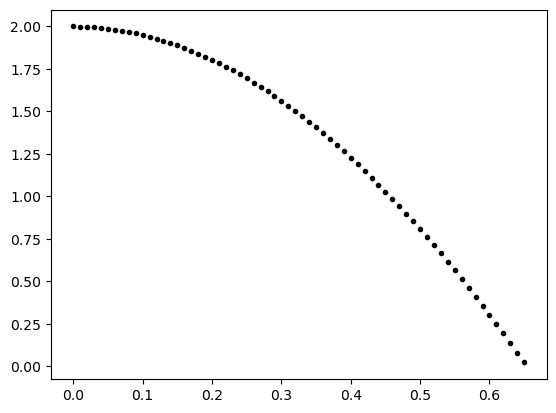

In [14]:
plt.plot(t,y,'.k')

In [15]:
def y1(t,y0):
    return y0 - g*t**2/2

In [24]:
def y2(t,y0):
    vT = np.sqrt(g/D)
    return y0 - (vT**2/g)*np.log( np.cosh(g*t/vT) )

In [25]:
y0 = 2 #m
g = 9.81 #m/s2
D = 0.065
tempo = np.array([0.1,0.2,0.3])
y1(tempo,y0)

array([1.95095, 1.8038 , 1.55855])

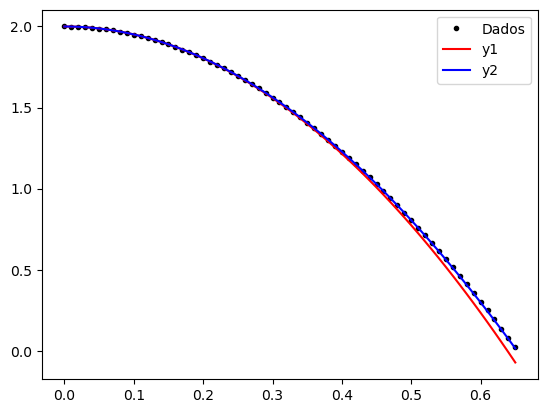

In [27]:
plt.plot(t,y,'.k',label='Dados')
plt.plot(t, y1(t,y0),'r',label='y1')
plt.plot(t,y2(t,y0),'b',label='y2')
plt.legend()

**Exemplo 4**: dados meteorológicos

In [12]:
#Teste Loop no nome dos arquivo
for i in range(1,13):
    if i < 10:
        print('alto_da_boa_vista_20230'+str(i)+'_Met.txt')
    else:
        print('alto_da_boa_vista_2023'+str(i)+'_Met.txt')

alto_da_boa_vista_202301_Met.txt
alto_da_boa_vista_202302_Met.txt
alto_da_boa_vista_202303_Met.txt
alto_da_boa_vista_202304_Met.txt
alto_da_boa_vista_202305_Met.txt
alto_da_boa_vista_202306_Met.txt
alto_da_boa_vista_202307_Met.txt
alto_da_boa_vista_202308_Met.txt
alto_da_boa_vista_202309_Met.txt
alto_da_boa_vista_202310_Met.txt
alto_da_boa_vista_202311_Met.txt
alto_da_boa_vista_202312_Met.txt


In [34]:
#importe dados e calcule total de precipitação e temperatura média cada mês
chuva = []
temperatura = []
for i in range(1,13):
    if i < 10:
        data = np.loadtxt('dados_meteorologicos/alto_da_boa_vista_20230'+str(i)+'_Met.txt',usecols=(2,5),skiprows=6)
    else:
        data = np.loadtxt('dados_meteorologicos/alto_da_boa_vista_2023'+str(i)+'_Met.txt',usecols=(2,5),skiprows=6)
    chuva.append( data[:,0].sum() )
    temperatura.append( data[:,1].mean() )

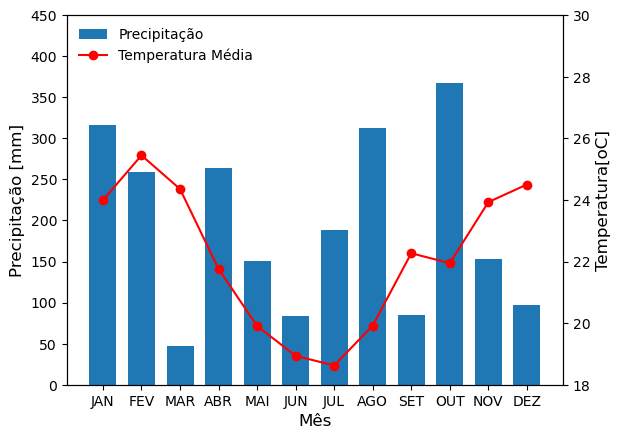

In [35]:
#Vamos fazer o gráfico
mes = ['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
plot1 = plt.bar(mes,chuva,width=0.7)
plt.ylim(0,450)
plt.ylabel('Precipitação [mm]',fontsize=12)
plt.xlabel('Mês',fontsize=12)
plt.twinx()
plot2 = plt.plot(mes,temperatura,'r-o')
plt.ylim(18,30)
plt.ylabel('Temperatura[oC]',fontsize=12)
lines = [plot1] + plot2
legendas = ['Precipitação','Temperatura Média']
plt.legend(lines, legendas, loc=2, frameon=False)

**4. Ajuste de Curvas**

In [24]:
data = np.loadtxt('dados_pendulo.txt')
comp = data[:,0]
T = data[:,1]
sigmaT = data[:,2]

<ErrorbarContainer object of 3 artists>

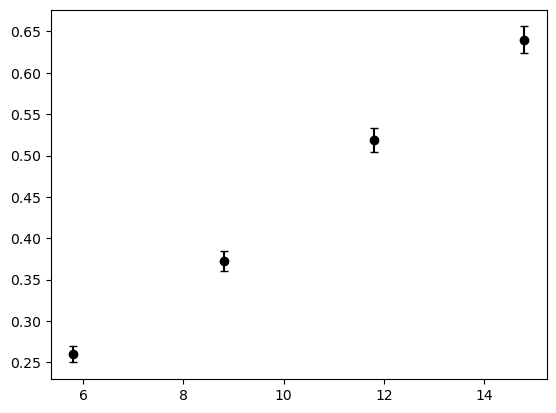

In [25]:
T2 = T**2
sigmaT2 = 2*T*sigmaT
plt.errorbar(comp,T2,sigmaT2,capsize=3,fmt='ok')

In [26]:
def periodo2(L,a,b):
    return a*L + b

In [27]:
popt,pcov = curve_fit(periodo2,comp,T2,sigma=sigmaT2,absolute_sigma=True)
popt

array([0.04258387, 0.00890565])

In [28]:
err_y = np.sqrt(np.diag(pcov))
err_y

array([0.00193438, 0.01881484])

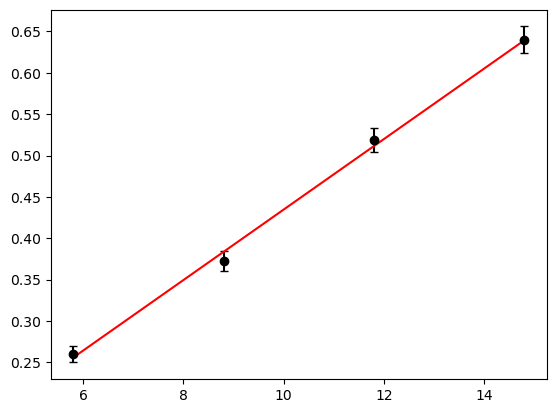

In [29]:
x = np.linspace(comp.min(),comp.max(),100)
plt.errorbar(comp,T2,sigmaT2,capsize=3,fmt='ok')
plt.plot(x,periodo2(x,popt[0],popt[1]),'r')

**5. Integração Numérica**

In [30]:
f1 = lambda x: 1/np.sqrt(np.abs(x))

In [32]:
quad(f1,-1,1,points=[0])

(3.9999999999999813, 5.684341886080802e-14)

**6. Equações Diferenciais**

6.1 - ED0 de primeira ordem

In [34]:
def dydt(t,y):
    return -k*y

In [35]:
k = 0.2
y0 = 100
#intervalo de tempo
t0, tf = 0,20

In [36]:
solve_ivp (dydt , (t0 , tf), y0 = [y0])

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.13797324,  1.51770566,  6.11233264, 10.4942851 ,
       14.88942184, 19.28378064, 20.        ])
 t_events: None
        y: array([[100.        ,  97.27826059,  73.81996665,  29.46989971,
         12.27361105,   5.09829981,   2.11809624,   1.83542088]])
 y_events: None

In [37]:
sol1 = solve_ivp (dydt ,(t0, tf), [y0])
sol1.y

array([[100.        ,  97.27826059,  73.81996665,  29.46989971,
         12.27361105,   5.09829981,   2.11809624,   1.83542088]])

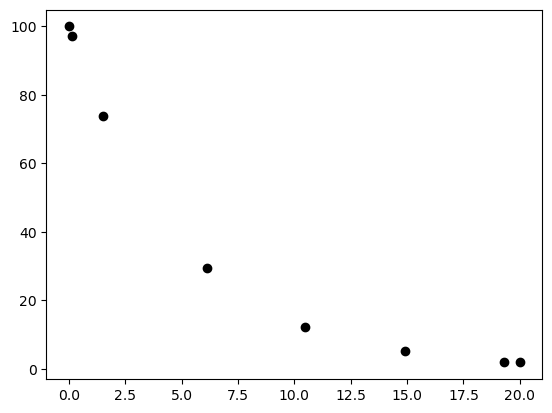

In [38]:
plt.plot(sol1.t,sol1.y[0],'ok')

Para obter a solução com uma maior resolução temporal, podemos passar um array para o argumenot **t_eval**

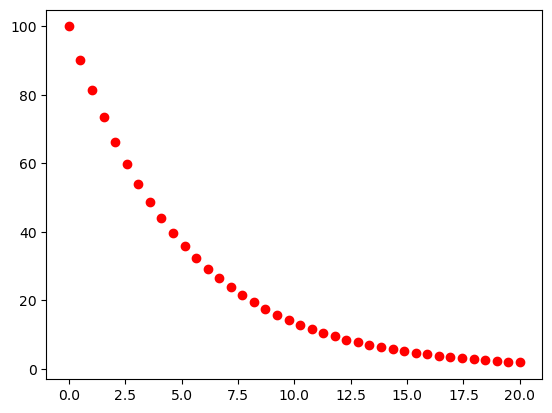

In [40]:
tpoints = np.linspace(t0,tf,40)
sol2 = solve_ivp (dydt, (t0, tf), [y0],t_eval=tpoints)
plt.plot(sol2.t, sol2.y[0],'ro')

6.2 - ED0s Acopladas
\begin{eqnarray*}
&\frac{dx}{dt} = xy - x, \\
&\frac{dy}{dt} = y -xy + sen^2\omega t \\
\end{eqnarray*}

In [53]:
def F(t,Y):
    x,y  = Y
    dxdt = x*y - x
    dydt = y - x*y + np.sin(omega*t)**2
    return dxdt, dydt

In [55]:
r0 = [1.,1.]
omega = 1
N = 100
t0,tf = 0,10
tpoints = np.linspace(t0,tf,N)
sol3 = solve_ivp(F,(t0, tf), y0=r0,t_eval=tpoints)

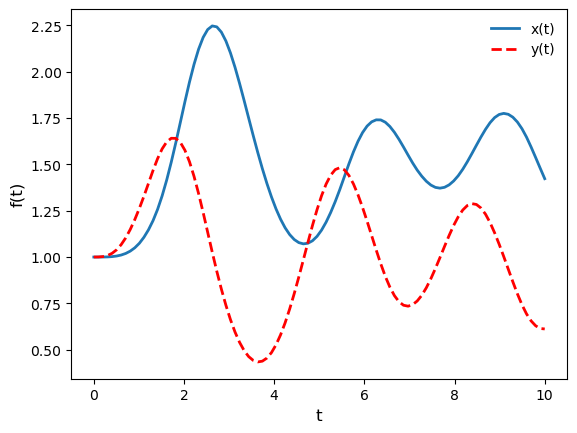

In [60]:
plt.plot(tpoints,sol3.y[0],lw=2,label='x(t)')
plt.plot(tpoints,sol3.y[1],'--r',lw=2,label='y(t)')
plt.xlabel('t',fontsize=12)
plt.ylabel('f(t)',fontsize=12)
plt.legend(frameon=False)

6.3 EDOs de Segunda Ordem
\begin{equation}
    \frac{d^2x}{dt^2} \,=\, - \omega^2 x \nonumber
\end{equation}

In [62]:
omega = 0.9
A = 3
v0 = 0
t0,tf = 0,20
t = np.linspace(t0,tf,100)

In [64]:
def F(t,Y):
    x,v = Y
    dxdt = v
    dvdt = -omega**2*x
    return dxdt,dvdt

In [65]:
sol4 = solve_ivp(F,(t0,tf),y0=[A,v0],t_eval=t)
print(sol4.success)

True


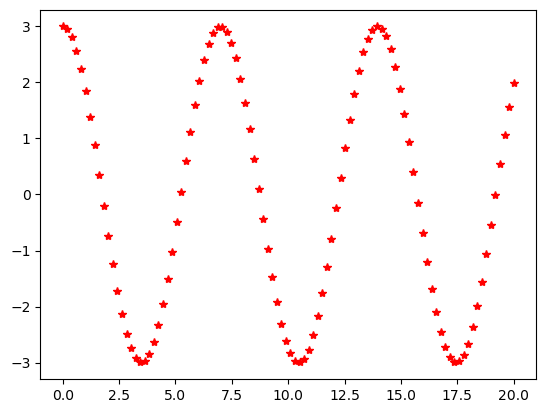

In [67]:
#plot solução
plt.plot(sol4.t,sol4.y[0],'r*')

**Exemplo 4: Pêndulo Não-Linear**

\begin{equation}
\frac{d\theta}{dt} = \psi \\
\frac{d\psi}{dt} = - \omega^2\textrm{sen}\theta
\end{equation}

In [68]:
def pendulo(t,Y,omega):
    theta,psi = Y
    dthdt = psi
    dpsidt = -omega**2*np.sin(theta)
    return dthdt, dpsidt

In [69]:
#Pendulo linear (para comparação)
def pend_linear(t,theta0):
    return theta0*np.cos(omega*t)

In [70]:
#constantets
omega = 0.7
t0,tf = 0,20
t = np.linspace(t0,tf,200)

In [71]:
#theta0 = 10 graus
y0_1 = [np.radians(10.),0.]
sol_pend1 = solve_ivp(pendulo, (t0, tf), y0 = y0_1,args=(omega,),t_eval=t)

In [73]:
#theta0 = 60 graus
y0_2 = [np.radians(60.),0.]
sol_pend2 = solve_ivp(pendulo, (t0, tf), y0 = y0_2,args=(omega,),t_eval=t)

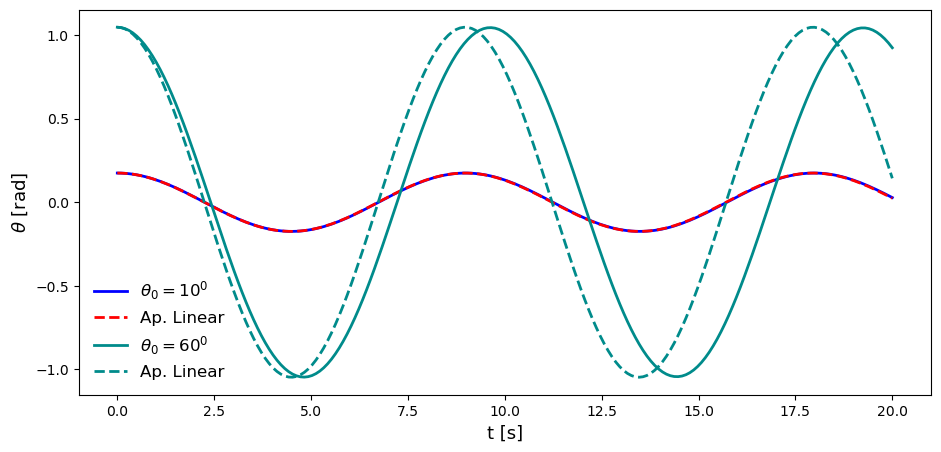

In [74]:
plt.figure(figsize=(11,5))
plt.plot(sol_pend1.t,sol_pend1.y[0],'b',lw=2,label=r'$\theta_0 = 10^{0}$')
plt.plot(t,pend_linear(t,y0_1[0]),'r--',lw=2,label='Ap. Linear')
plt.plot(sol_pend2.t,sol_pend2.y[0],c='darkcyan',lw=2,label=r'$\theta_0 = 60^{0}$')
plt.plot(t,pend_linear(t,y0_2[0]),c='darkcyan',ls='--',lw=2,label='Ap. Linear')
plt.xlabel('t [s]',fontsize=13)
plt.ylabel(r'$\theta$ [rad]',fontsize=13)
plt.legend(loc=3,fontsize=12,frameon=False)

**Conservação da Energia** \
$E = \frac{1}{2}m\,L^2\psi^2 + mg\,l(1 - cos\theta)$

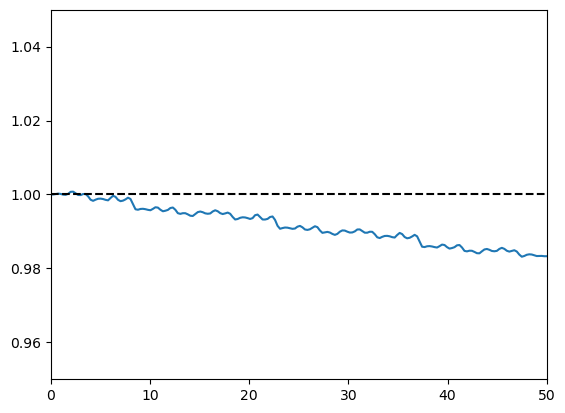

In [75]:
m = 1
g = 9.81
L = g/omega**2
t0,tf = (0,50)
sol_pend3 = solve_ivp(pendulo, (t0, tf), y0 = y0_2,args=(omega,),t_eval=np.linspace(0,tf,200)) #DOP853
Etotal = m*g*L*(1-np.cos(y0_2[0]))
E = 0.5*m*L**2*sol_pend3.y[1]**2 +  m*g*L*(1-np.cos(sol_pend3.y[0]))
plt.plot(sol_pend3.t,E/Etotal)
plt.ylim(0.95,1.05)
plt.xlim(0,tf)
plt.hlines(1,0,tf,ls='--',color='k')